# Data Analytics Job Index
> *What are the skills required to become a Data Scientist?*


- From the curiosity, I developed a Web Scrapper for www.indeed.com, which is the largest job search platform, to automatically generate and visualize information about data analytics jobs as follows:
    1. How Many Data Analytics Jobs are There?
    2. Data Analytics Job Map
    3. Required Skills for Data Analytics
    4. Data Analytics Job Characteristics
        - 4.1 Salary by Job
        - 4.2 Salary by Location
        - 4.3 Word Cloud for Job Descriptions
        - 4.4 Saving the job list as a csv file


- This can be customized for any jobs or any locations in the United States.
- Since Indeed is currently available in over 60 countries and 28 languages, you can customize this scrapper for other countries in accordance with each website (see https://www.indeed.com/worldwide ).

## 0. Setup

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime, timedelta
import time
import random
import math

In [2]:
import matplotlib.pyplot as plt

# you can install Basemap package on https://www.lfd.uci.edu/~gohlke/pythonlibs/
from mpl_toolkits.basemap import Basemap   
from geopy.geocoders import Nominatim

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49, projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
geolocator = Nominatim(user_agent="data-analytics", timeout=5)

In [3]:
def get_url(keyword, location, time_window, start):
    keyword = keyword.replace('+', '%2B').replace('#', '%23').replace(',', '%2C').replace(' ', '+')
    location = location.replace('+', '%2B').replace('#', '%23').replace(',', '%2C').replace(' ', '+')
    url_template = "https://www.indeed.com/jobs?q={}&l={}&fromage={}&jt=fulltime&limit=50&start={}"
    return url_template.format(keyword, location, time_window, start)

def get_soup(url):
    html = requests.get(url)
    return BeautifulSoup(html.text, 'html.parser')

#### Define time window

In [4]:
# Jobs posted within past __ days
time_window = 91

now = datetime.now()
before = now - timedelta(days=time_window)
query_period = before.strftime("%m/%d,%Y") + ' ~ ' + now.strftime("%m/%d,%Y")

## 1. How Many Data Analytics Jobs are There?

#### Setting

In [5]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [6]:
# Where are you interested in?
location = 'United States'

#### Scrapping

In [7]:
keyword_job = {}

for keyword in list_of_keyword:
    try:            
        soup = get_soup(get_url(keyword, location, time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(7)
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword)
                continue
    
    try:    
        keyword_job[keyword.title()] = int(total_jobs.replace(',',''))
    except:
        print('\n------ There are no {} job postings --------'.format(keyword))
        continue

#### Visualization

During the period of 07/03,2018 ~ 10/02,2018, 
  The number of Data Engineer job postings in United States: 105196
  The number of Data Analyst job postings in United States: 79985
  The number of Data Scientist job postings in United States: 26185
  The number of Data Architect job postings in United States: 25116


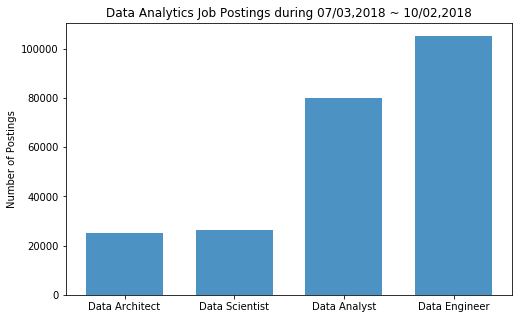

In [8]:
keywords = sorted(keyword_job, key=keyword_job.__getitem__, reverse=True)
y_pos = np.arange(len(keywords))
count = sorted(keyword_job.values(), reverse=True)

print('During the period of {}, '.format(query_period)) 
for j in range(len(keywords)):
    print('  The number of {} job postings in {}: {}'.format(keywords[j],location, count[j]))

keywords = keywords[::-1]    
count = count[::-1]

plt.rcParams['figure.figsize'] = (8,5)
plt.bar(y_pos, count, align='center', width=0.7, alpha=0.8)
plt.xticks(y_pos, keywords)
plt.ylabel('Number of Postings')
plt.title('Data Analytics Job Postings during {}'.format(query_period))

plt.show()

## 2. Data Analytics Job Map

#### Setting

In [9]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [10]:
# Where are you interested in?
# Top 50 US cities of job postings in Indeed.com
list_of_location = ['Indianapolis, Indiana','Jacksonville, Florida','Los Angeles, California','Madison, Wisconsin','Fort Worth, Texas','Baltimore, Maryland','Colorado Springs, Colorado',
                    'Tucson, Arizona','Cincinnati, Ohio','Houston, Texas','Milwaukee, Wisconsin','Charlotte, North Carolina','Phoenix, Arizona','Kansas City, Missouri','Tampa, Florida','Philadelphia, Pennsylvania',
                    'San Diego, California','Columbus, Ohio','Chicago, Illinois','Irvine, California','Pittsburgh, Pennsylvania','Austin, Texas','St. Louis, Missouri','New York, New York State','Memphis, Tennessee',
                    'Minneapolis, Minnesota','Oklahoma City, Oklahoma','Omaha, Nebraska','Portland, Oregon','Raleigh, North Carolina','Dallas, Texas','Salt Lake City, Utah','Albuquerque, New Mexico','Seattle, Washington State',
                    'San Jose, California','Louisville, Kentucky','Richmond, Virginia','Sacramento, California','Orlando, Florida','Atlanta, Georgia','Miami, Florida','Denver, Colorado','Tulsa, Oklahoma',
                    'Washington, DC','San Francisco, California','Nashville, Tennessee','Las Vegas, Nevada','Boston, Massachusetts','San Antonio, Texas','Cleveland, Ohio']

#### Scrapping

In [11]:
keyword_location_job = []

for keyword in list_of_keyword:
    print('\nFor {} Jobs ({} locations):'.format(keyword.title(), len(list_of_location)))
    try:            
        soup = get_soup(get_url(keyword, 'United States', time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(7)
            soup = get_soup(get_url(keyword, 'United States', time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, 'United States', time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword) 
                continue

    total_jobs = int(total_jobs.replace(',',''))
     
        
    location_job = {}
    location_index = 0
    
    for location in list_of_location:
        location_index += 1

        try:            
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    job_count = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(7)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        job_count = tag.get("content", None).split(' ')[0]
            except:
                try:
                    time.sleep(31)
                    soup = get_soup(get_url(keyword, location, time_window, 0))
                    for tag in soup.find_all("meta"):
                        if tag.get("name", None) == "description":
                            job_count = tag.get("content", None).split(' ')[0]
                except:
                    print('ConnectionError ', location)  
                    continue

        print(location_index, end=' ')
        
        try:    
            location_job[location] = int(job_count.replace(',',''))
        except:
            print('\n------ There are no {} job postings in {} --------'.format(keyword, location))
            continue

    print('')
    keyword_location_job.append((keyword, total_jobs, location_job))


For Data Scientist Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Analyst Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Engineer Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

For Data Architect Jobs (50 locations):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 


#### Visualization

During the period of 07/03,2018 ~ 10/02,2018, 

For data scientist Jobs, 
  In San Francisco, California, there are 2378 (9.1%) data scientist job postings.
  In San Jose, California, there are 2344 (9.0%) data scientist job postings.
  In New York, New York State, there are 2034 (7.8%) data scientist job postings.
  In Washington, DC, there are 1995 (7.6%) data scientist job postings.
  In Boston, Massachusetts, there are 1886 (7.2%) data scientist job postings.
  In Seattle, Washington State, there are 1655 (6.3%) data scientist job postings.
  In Denver, Colorado, there are 755 (2.9%) data scientist job postings.
  In Los Angeles, California, there are 738 (2.8%) data scientist job postings.
  In Chicago, Illinois, there are 605 (2.3%) data scientist job postings.
  In Philadelphia, Pennsylvania, there are 592 (2.3%) data scientist job postings.
  In San Diego, California, there are 459 (1.8%) data scientist job postings.
  In Raleigh, North Carolina, there are 391 (1.5%) data scien

  In Dallas, Texas, there are 2239 (2.1%) data engineer job postings.
  In Austin, Texas, there are 1803 (1.7%) data engineer job postings.
  In Atlanta, Georgia, there are 1791 (1.7%) data engineer job postings.
  In Philadelphia, Pennsylvania, there are 1565 (1.5%) data engineer job postings.
  In San Diego, California, there are 1494 (1.4%) data engineer job postings.
  In Minneapolis, Minnesota, there are 1399 (1.3%) data engineer job postings.
  In Irvine, California, there are 1361 (1.3%) data engineer job postings.
  In Houston, Texas, there are 1308 (1.2%) data engineer job postings.
  In Phoenix, Arizona, there are 1187 (1.1%) data engineer job postings.
  In Raleigh, North Carolina, there are 1186 (1.1%) data engineer job postings.
  In Fort Worth, Texas, there are 1078 (1.0%) data engineer job postings.
  In Portland, Oregon, there are 1007 (1.0%) data engineer job postings.
  In Pittsburgh, Pennsylvania, there are 850 (0.8%) data engineer job postings.
  In Charlotte, North

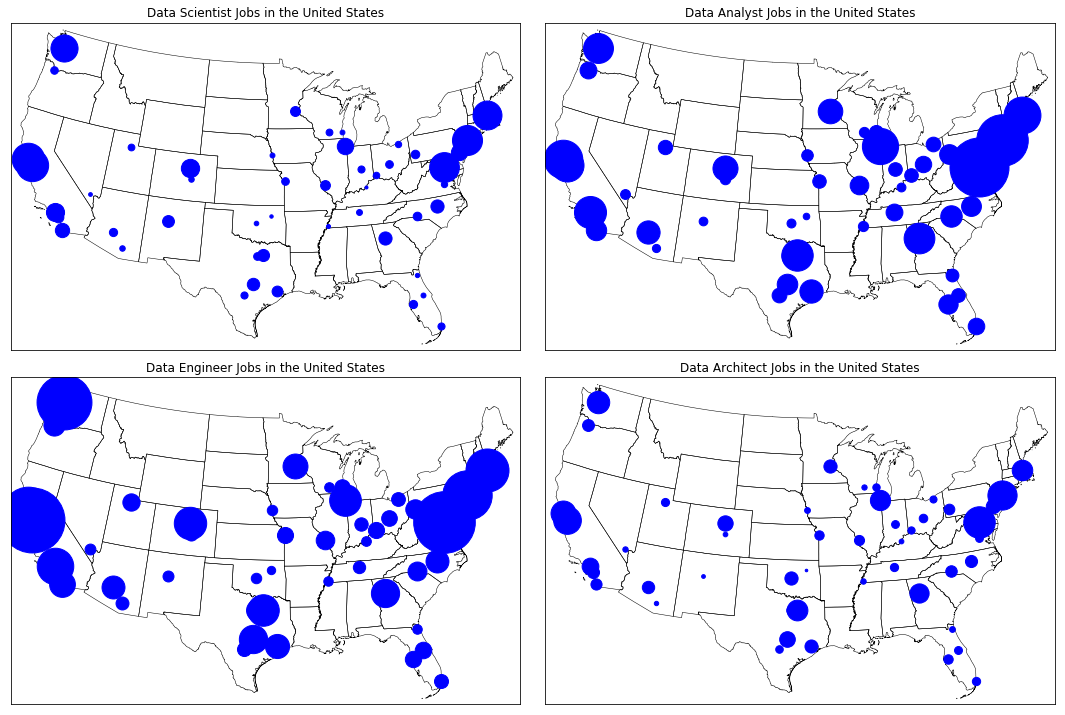

In [12]:
if len(keyword_location_job)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,5*len(keyword_location_job)//2)
else:
    plt.rcParams['figure.figsize'] = (15,5*(len(keyword_location_job)//2+1))

    
print('During the period of {}, '.format(query_period))    
for i in range(len(keyword_location_job)):
    keyword = keyword_location_job[i][0]
    total_jobs = keyword_location_job[i][1]
    location_job = keyword_location_job[i][2]
    location_list = sorted(location_job, key=location_job.__getitem__, reverse=True)
    job_list = sorted(location_job.values(), reverse=True)
    
    if len(keyword_location_job)%2 == 0:
        plt.subplot(len(keyword_location_job)//2,2,i+1)
    else:
        plt.subplot(len(keyword_location_job)//2 + 1,2,i+1)
    
    plt.title(keyword.title() + ' Jobs in the United States')

    # Keep in mind to have the following files (st99_d00.shx, st99_d00.shp, st99_d00.dbf) in your directory
    # The files can be found on https://github.com/matplotlib/basemap/tree/master/examples
    map.readshapefile('maps\st99_d00', name='states', drawbounds=True)

    print('\nFor {} Jobs, '.format(keyword))
    for (location, count) in zip(location_list, job_list):
        try:
            loc = geolocator.geocode(location)
            x, y = map(loc.longitude, loc.latitude)
            percent = count/total_jobs*100
            size = math.sqrt(count)/1.5
            map.plot(x,y,marker='o',color='Blue',markersize=size)
            print('  In {}, there are {} ({:.1f}%) {} job postings.'.format(location, count, percent, keyword))  
        except:
            pass

plt.tight_layout()
plt.show()

## 3. Required Skills for Data Analytics

#### Setting

In [13]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [14]:
# Where are you interested in?
location = 'United States'

In [15]:
# Define skill sets you are intrested in

# Top 20 programing languages (in demand) based on IEEE Spectrum ranking 2018 (https://spectrum.ieee.org/static/interactive-the-top-programming-languages-2018)
program_languages = ['Python', 'Java', 'C', 'C++', 'C#', 'JavaScript', 'Assembly', 'PHP', 'HTML', 'Scala', 'Shell', 'Ruby', 'Matlab', 'R', 'Perl', 'Go', 'SQL', 'Objective-C', 'Arduino', 'Swift']
analysis_tool = ['Excel', 'SAS', 'STATA', 'SPSS', 'R', 'Matlab', 'Minitab']
machine_learning = ['Machine Learning','Natural Language Processing','Image Processing','Artificial Intelligence','TensorFlow', 'Pytorch', 'Caffe']

databases = ['SQL','NoSQL','HBase','Cassandra','MongoDB','MySQL','SQL Server', 'Oracle', 'JSON']
bigdata_tool = ['Hadoop','MapReduce','Spark','Pig','Hive','Shark','Impala','Oozie','ZooKeeper','Flume','Mahout']
cloud_services = ['AWS', 'Azure', 'Google Cloud']

visualization_tool = ['Tableau', 'Plotly', 'D3.js', 'Google Chart', 'Chart.js', 'HighCharts']


# Merge skill sets and remove duplicates
list_of_skill = list(set(program_languages + analysis_tool + machine_learning + databases + bigdata_tool+ cloud_services + visualization_tool))

#### Scrapping

In [16]:
keyword_skill_job = []

for keyword in list_of_keyword:
    print('\nFor {} Jobs ({} skills):'.format(keyword.title(), len(list_of_skill)))
    try:
        soup = get_soup(get_url(keyword, location, time_window, 0))
        for tag in soup.find_all("meta"):
            if tag.get("name", None) == "description":
                total_jobs = tag.get("content", None).split(' ')[0]
    except:
        try:
            time.sleep(7)
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    total_jobs = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(31)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        total_jobs = tag.get("content", None).split(' ')[0]
            except:
                print('ConnectionError ', keyword) 
                continue
                
    try:    
        total_jobs = int(total_jobs.replace(',',''))
    except:
        print('------ There are no {} job postings --------'.format(keyword))
        continue
     
        
    skill_job = {}
    skill_index = 0
    
    for skill in list_of_skill:
        keyword_ = keyword + ' ' + skill
        skill_index += 1

        try:            
            soup = get_soup(get_url(keyword_, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    job_count = tag.get("content", None).split(' ')[0]
        except:
            try:
                time.sleep(7)
                soup = get_soup(get_url(keyword_, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        job_count = tag.get("content", None).split(' ')[0]
            except:
                try:
                    time.sleep(31)
                    soup = get_soup(get_url(keyword_, location, time_window, 0))
                    for tag in soup.find_all("meta"):
                        if tag.get("name", None) == "description":
                            job_count = tag.get("content", None).split(' ')[0]
                except:
                    print('ConnectionError ', skill)  
                    continue

        print(skill_index, end=' ')
        
        try:    
            skill_job[skill] = int(job_count.replace(',',''))
        except:
            print('\n------ There are no {} job postings requiring {} --------'.format(keyword, skill))
            continue
   
    print('')
    keyword_skill_job.append((keyword, total_jobs, skill_job))


For Data Scientist Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Analyst Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 
------ There are no data analyst job postings requiring Chart.js --------
19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Engineer Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 

For Data Architect Jobs (60 skills):
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 


#### Visualization

During the period of 07/03,2018 ~ 10/02,2018, 

For data scientist Jobs, 
  There are 8370 (32.0%) data scientist job postings requiring Python.
  There are 7107 (27.2%) data scientist job postings requiring Machine Learning.
  There are 5668 (21.7%) data scientist job postings requiring SAS.
  There are 5437 (20.8%) data scientist job postings requiring SQL.
  There are 5220 (19.9%) data scientist job postings requiring Excel.
  There are 4893 (18.7%) data scientist job postings requiring R.
  There are 4134 (15.8%) data scientist job postings requiring Java.
  There are 3328 (12.7%) data scientist job postings requiring Hadoop.
  There are 2945 (11.3%) data scientist job postings requiring Spark.
  There are 2751 (10.5%) data scientist job postings requiring C++.
  There are 2211 (8.4%) data scientist job postings requiring C.
  There are 2131 (8.1%) data scientist job postings requiring AWS.
  There are 1992 (7.6%) data scientist job postings requiring Tableau.
  There are 1697 (6.5

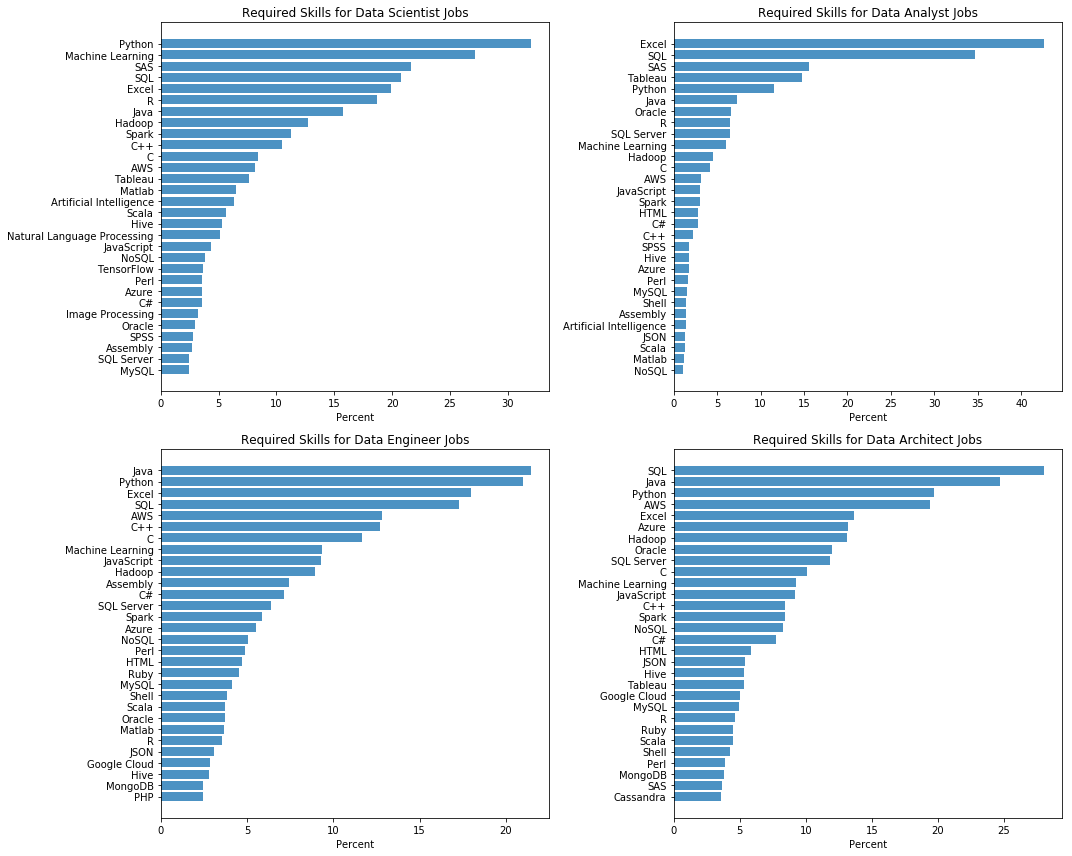

In [17]:
if len(keyword_skill_job)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,6*len(keyword_skill_job)//2)
else:
    plt.rcParams['figure.figsize'] = (15,6*(len(keyword_skill_job)//2+1))

    
print('During the period of {}, '.format(query_period))    
for i in range(len(keyword_skill_job)):
    keyword = keyword_skill_job[i][0]
    total_jobs = keyword_skill_job[i][1]
    skill_job = keyword_skill_job[i][2]
    
    top30_skills = sorted(skill_job, key=skill_job.__getitem__, reverse=True)[0:30]
    y_pos = np.arange(len(top30_skills))
    count = sorted(skill_job.values(), reverse=True)[0:30]
    percent = [c/total_jobs*100 for c in count]
    
    print('\nFor {} Jobs, '.format(keyword))
    for j in range(len(top30_skills)):
        print('  There are {} ({:.1f}%) {} job postings requiring {}.'.format(count[j], percent[j], keyword, top30_skills[j])) 

        
    if len(keyword_skill_job)%2 == 0:
        plt.subplot(len(keyword_skill_job)//2,2,i+1)
    else:
        plt.subplot(len(keyword_skill_job)//2 + 1,2,i+1)
    
    top30_skills = top30_skills[::-1]
    percent = percent[::-1]
    plt.barh(y_pos, percent, align='center', height = 0.8,  alpha=0.8)
    plt.yticks(y_pos, top30_skills)
    plt.xlabel('Percent')
    plt.title('Required Skills for '+ keyword.title() + ' Jobs')

plt.tight_layout()
plt.show()

## 4. Data Analytics Job Characteristics
- It may take several hours in scrapping detailed information for more than ten thousand job postings.
- You can do it faster by limiting the number of jobs to be scrapped.

#### Setting

In [18]:
# Range: 1 ~ 1000 (maximum number of queries on Indeed.com)
max_results_limit = 1000 

In [19]:
# Which job are you interested in?
list_of_keyword = ['data scientist','data analyst','data engineer', 'data architect']

In [20]:
# Where are you interested in?
# Top 50 US cities of job postings in Indeed.com
list_of_location = ['Indianapolis, Indiana','Jacksonville, Florida','Los Angeles, California','Madison, Wisconsin','Fort Worth, Texas','Baltimore, Maryland','Colorado Springs, Colorado',
                    'Tucson, Arizona','Cincinnati, Ohio','Houston, Texas','Milwaukee, Wisconsin','Charlotte, North Carolina','Phoenix, Arizona','Kansas City, Missouri','Tampa, Florida','Philadelphia, Pennsylvania',
                    'San Diego, California','Columbus, Ohio','Chicago, Illinois','Irvine, California','Pittsburgh, Pennsylvania','Austin, Texas','St. Louis, Missouri','New York, New York State','Memphis, Tennessee',
                    'Minneapolis, Minnesota','Oklahoma City, Oklahoma','Omaha, Nebraska','Portland, Oregon','Raleigh, North Carolina','Dallas, Texas','Salt Lake City, Utah','Albuquerque, New Mexico','Seattle, Washington State',
                    'San Jose, California','Louisville, Kentucky','Richmond, Virginia','Sacramento, California','Orlando, Florida','Atlanta, Georgia','Miami, Florida','Denver, Colorado','Tulsa, Oklahoma',
                    'Washington, DC','San Francisco, California','Nashville, Tennessee','Las Vegas, Nevada','Boston, Massachusetts','San Antonio, Texas','Cleveland, Ohio']


'''
# 50 states + DC 
list_of_location = ['Alabama','Alaska','Arizona','Arkansas','California', 'Connecticut','Delaware','Florida','Georgia','New York','Colorado','Hawaii', 'Idaho','Illinois',
                    'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi', 'Missouri','Montana',
                    'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','North Carolina','North Dakota','Ohio','Oklahoma','Oregon', 'Pennsylvania','Rhode Island',
                    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia', 'Wisconsin','Wyoming','Washington, DC'   
                    ]
'''

"\n# 50 states + DC \nlist_of_location = ['Alabama','Alaska','Arizona','Arkansas','California', 'Connecticut','Delaware','Florida','Georgia','New York','Colorado','Hawaii', 'Idaho','Illinois',\n                    'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi', 'Missouri','Montana',\n                    'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','North Carolina','North Dakota','Ohio','Oklahoma','Oregon', 'Pennsylvania','Rhode Island',\n                    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia', 'Wisconsin','Wyoming','Washington, DC',   \n                    ]\n"

#### Scrapping

In [21]:
df_list = pd.DataFrame(columns=["Keyword", "Title","Company", "Location", "Company_Location","Salary", "Summary", 
                                "Description_URL", "Company_URL"])

for keyword in list_of_keyword:
    print('\nFor {} Jobs:'.format(keyword.title()))

    location_index = 0
    for location in list_of_location:
        location_index += 1
        location_count = 0

        # count the number of jobs
        max_results_per_location = 0
        try:            
            soup = get_soup(get_url(keyword, location, time_window, 0))
            for tag in soup.find_all("meta"):
                if tag.get("name", None) == "description":
                    max_results_per_location = tag.get("content", None).split(' ')[0].replace(',','')
        except:
            try:
                time.sleep(7)
                soup = get_soup(get_url(keyword, location, time_window, 0))
                for tag in soup.find_all("meta"):
                    if tag.get("name", None) == "description":
                        max_results_per_location = tag.get("content", None).split(' ')[0].replace(',','')
            except:
                pass
        try:    
            max_results_per_location = int(max_results_per_location)
        except:
            print('------ There are no job postings in {} --------'.format(location))
            continue

        if (max_results_per_location == 0) or (max_results_per_location > max_results_limit):
            max_results_per_location = max_results_limit


        for start in range(0, max_results_per_location, 50):
            # request URL
            try:
                soup = get_soup(get_url(keyword, location, time_window, start))            
            except:
                try:
                    time.sleep(7)
                    soup = get_soup(get_url(keyword, location, time_window, start)) 
                except:
                    try:
                        time.sleep(31)
                        soup = get_soup(get_url(keyword, location, time_window, start))
                    except:
                        try:
                            time.sleep(181)
                            soup = get_soup(get_url(keyword, location, time_window, start))
                        except:
                            print('ConnectionError ', location_count)  
                            continue

            for each in soup.find_all(class_= "result" ):
                # scrape job title
                try: 
                    title = each.find(class_='jobtitle').text.replace('\n', '')
                except:
                    title = None

                # scrape company name
                try: 
                    company = each.find(class_='company').text.replace('\n', '').split('        ')[1]
                except:
                    company = None

                # scrape company location
                try:
                    company_location = each.find('span', {'class':"location" }).text.replace('\n', '')
                except:
                    company_location = None

                # scrape job salary
                try:
                    salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
                    salary_ = salary.replace('$', '').replace('                ','').replace(',','').split(' ')
                    if len(salary_) == 3 or len(salary_) == 4:
                        if salary_[2]=='hour':
                            salary_[0] = float(salary_[0]) * 2080
                            salary_[2] = salary_[0]
                        elif salary_[2]=='day':
                            salary_[0] = float(salary_[0]) * 365
                            salary_[2] = salary_[0]
                        elif salary_[2]=='month':
                            salary_[0] = float(salary_[0]) * 12
                            salary_[2] = salary_[0]
                        else:
                            salary_[0] = float(salary_[0])
                            salary_[2] = salary_[0]

                    if len(salary_) == 5 or len(salary_) == 6:
                        if salary_[4]=='hour':
                            salary_[0] = float(salary_[0]) * 2080
                            salary_[2] = float(salary_[2]) * 2080
                        elif salary_[4]=='day':
                            salary_[0] = float(salary_[0]) * 365
                            salary_[2] = float(salary_[2]) * 365
                        elif salary_[4]=='month':
                            salary_[0] = float(salary_[0]) * 12
                            salary_[2] = float(salary_[2]) * 12
                        else:
                            salary_[0] = float(salary_[0])
                            salary_[2] = float(salary_[2])

                    salary_avg = (salary_[0]+salary_[2])/2
                except:
                    salary_avg = None

                # scrape job descriptions                    
                try:
                    summary = each.find('span', {'class':'summary'}).text.replace('.', '')            
                except:
                    summary = ""

                try:
                    description_url = each.find(class_='jobtitle').find('a')['href']
                    description_url = 'https://www.indeed.com'+ description_url
                except:
                    description_url = None

                # scrape company URL             
                try:
                    company_url = each.find(class_='company').find('a')['href']
                    company_url = 'https://www.indeed.com'+ company_url
                except:
                    company_url = None


                # store all scraped informatino             
                df_list = df_list.append({"Keyword":keyword, "Title":title, "Company":company,"Location":location, "Company_Location":company_location, 
                                          "Salary":salary_avg, "Summary":summary, "Description_URL": description_url, "Company_URL": company_url}, ignore_index=True)

                location_count += 1
                if location_count % 100 == 0:
                    print('In {}, {} jobs are scrapped.'.format(location, location_count))
                    ran = [0,1,2,3]
                    time.sleep(random.choice(ran))

        print('------ {} ({}/{}) scrapping finished --------'.format(location, location_index, len(list_of_location)))
        df_list = df_list.drop_duplicates(['Keyword', 'Title', 'Company', 'Location'], keep='first')


For Data Scientist Jobs:
In Indianapolis, Indiana, 100 jobs are scrapped.
------ Indianapolis, Indiana (1/50) scrapping finished --------
------ Jacksonville, Florida (2/50) scrapping finished --------
In Los Angeles, California, 100 jobs are scrapped.
In Los Angeles, California, 200 jobs are scrapped.
In Los Angeles, California, 300 jobs are scrapped.
In Los Angeles, California, 400 jobs are scrapped.
In Los Angeles, California, 500 jobs are scrapped.
In Los Angeles, California, 600 jobs are scrapped.
In Los Angeles, California, 700 jobs are scrapped.
------ Los Angeles, California (3/50) scrapping finished --------
In Madison, Wisconsin, 100 jobs are scrapped.
------ Madison, Wisconsin (4/50) scrapping finished --------
In Fort Worth, Texas, 100 jobs are scrapped.
------ Fort Worth, Texas (5/50) scrapping finished --------
In Baltimore, Maryland, 100 jobs are scrapped.
In Baltimore, Maryland, 200 jobs are scrapped.
In Baltimore, Maryland, 300 jobs are scrapped.
------ Baltimore, Mar

In San Francisco, California, 600 jobs are scrapped.
In San Francisco, California, 700 jobs are scrapped.
In San Francisco, California, 800 jobs are scrapped.
In San Francisco, California, 900 jobs are scrapped.
In San Francisco, California, 1000 jobs are scrapped.
------ San Francisco, California (45/50) scrapping finished --------
------ Nashville, Tennessee (46/50) scrapping finished --------
------ Las Vegas, Nevada (47/50) scrapping finished --------
In Boston, Massachusetts, 100 jobs are scrapped.
In Boston, Massachusetts, 200 jobs are scrapped.
In Boston, Massachusetts, 300 jobs are scrapped.
In Boston, Massachusetts, 400 jobs are scrapped.
In Boston, Massachusetts, 500 jobs are scrapped.
In Boston, Massachusetts, 600 jobs are scrapped.
In Boston, Massachusetts, 700 jobs are scrapped.
In Boston, Massachusetts, 800 jobs are scrapped.
In Boston, Massachusetts, 900 jobs are scrapped.
In Boston, Massachusetts, 1000 jobs are scrapped.
------ Boston, Massachusetts (48/50) scrapping fi

------ Chicago, Illinois (19/50) scrapping finished --------
In Irvine, California, 100 jobs are scrapped.
In Irvine, California, 200 jobs are scrapped.
In Irvine, California, 300 jobs are scrapped.
In Irvine, California, 400 jobs are scrapped.
In Irvine, California, 500 jobs are scrapped.
In Irvine, California, 600 jobs are scrapped.
In Irvine, California, 700 jobs are scrapped.
In Irvine, California, 800 jobs are scrapped.
In Irvine, California, 900 jobs are scrapped.
------ Irvine, California (20/50) scrapping finished --------
In Pittsburgh, Pennsylvania, 100 jobs are scrapped.
In Pittsburgh, Pennsylvania, 200 jobs are scrapped.
In Pittsburgh, Pennsylvania, 300 jobs are scrapped.
In Pittsburgh, Pennsylvania, 400 jobs are scrapped.
In Pittsburgh, Pennsylvania, 500 jobs are scrapped.
In Pittsburgh, Pennsylvania, 600 jobs are scrapped.
In Pittsburgh, Pennsylvania, 700 jobs are scrapped.
In Pittsburgh, Pennsylvania, 800 jobs are scrapped.
------ Pittsburgh, Pennsylvania (21/50) scrappi

In Denver, Colorado, 900 jobs are scrapped.
In Denver, Colorado, 1000 jobs are scrapped.
------ Denver, Colorado (42/50) scrapping finished --------
------ Tulsa, Oklahoma (43/50) scrapping finished --------
In Washington, DC, 100 jobs are scrapped.
In Washington, DC, 200 jobs are scrapped.
In Washington, DC, 300 jobs are scrapped.
In Washington, DC, 400 jobs are scrapped.
In Washington, DC, 500 jobs are scrapped.
In Washington, DC, 600 jobs are scrapped.
In Washington, DC, 700 jobs are scrapped.
In Washington, DC, 800 jobs are scrapped.
In Washington, DC, 900 jobs are scrapped.
------ Washington, DC (44/50) scrapping finished --------
In San Francisco, California, 100 jobs are scrapped.
In San Francisco, California, 200 jobs are scrapped.
In San Francisco, California, 300 jobs are scrapped.
In San Francisco, California, 400 jobs are scrapped.
In San Francisco, California, 500 jobs are scrapped.
In San Francisco, California, 600 jobs are scrapped.
In San Francisco, California, 700 jobs

In Philadelphia, Pennsylvania, 400 jobs are scrapped.
In Philadelphia, Pennsylvania, 500 jobs are scrapped.
In Philadelphia, Pennsylvania, 600 jobs are scrapped.
In Philadelphia, Pennsylvania, 700 jobs are scrapped.
In Philadelphia, Pennsylvania, 800 jobs are scrapped.
In Philadelphia, Pennsylvania, 900 jobs are scrapped.
In Philadelphia, Pennsylvania, 1000 jobs are scrapped.
------ Philadelphia, Pennsylvania (16/50) scrapping finished --------
In San Diego, California, 100 jobs are scrapped.
In San Diego, California, 200 jobs are scrapped.
In San Diego, California, 300 jobs are scrapped.
In San Diego, California, 400 jobs are scrapped.
In San Diego, California, 500 jobs are scrapped.
In San Diego, California, 600 jobs are scrapped.
In San Diego, California, 700 jobs are scrapped.
In San Diego, California, 800 jobs are scrapped.
In San Diego, California, 900 jobs are scrapped.
In San Diego, California, 1000 jobs are scrapped.
------ San Diego, California (17/50) scrapping finished ----

In San Jose, California, 800 jobs are scrapped.
In San Jose, California, 900 jobs are scrapped.
In San Jose, California, 1000 jobs are scrapped.
------ San Jose, California (35/50) scrapping finished --------
In Louisville, Kentucky, 100 jobs are scrapped.
In Louisville, Kentucky, 200 jobs are scrapped.
------ Louisville, Kentucky (36/50) scrapping finished --------
In Richmond, Virginia, 100 jobs are scrapped.
In Richmond, Virginia, 200 jobs are scrapped.
In Richmond, Virginia, 300 jobs are scrapped.
In Richmond, Virginia, 400 jobs are scrapped.
------ Richmond, Virginia (37/50) scrapping finished --------
In Sacramento, California, 100 jobs are scrapped.
In Sacramento, California, 200 jobs are scrapped.
In Sacramento, California, 300 jobs are scrapped.
------ Sacramento, California (38/50) scrapping finished --------
In Orlando, Florida, 100 jobs are scrapped.
In Orlando, Florida, 200 jobs are scrapped.
In Orlando, Florida, 300 jobs are scrapped.
In Orlando, Florida, 400 jobs are scr

In Irvine, California, 200 jobs are scrapped.
In Irvine, California, 300 jobs are scrapped.
------ Irvine, California (20/50) scrapping finished --------
In Pittsburgh, Pennsylvania, 100 jobs are scrapped.
In Pittsburgh, Pennsylvania, 200 jobs are scrapped.
------ Pittsburgh, Pennsylvania (21/50) scrapping finished --------
In Austin, Texas, 100 jobs are scrapped.
In Austin, Texas, 200 jobs are scrapped.
In Austin, Texas, 300 jobs are scrapped.
In Austin, Texas, 400 jobs are scrapped.
In Austin, Texas, 500 jobs are scrapped.
------ Austin, Texas (22/50) scrapping finished --------
In St. Louis, Missouri, 100 jobs are scrapped.
In St. Louis, Missouri, 200 jobs are scrapped.
------ St. Louis, Missouri (23/50) scrapping finished --------
In New York, New York State, 100 jobs are scrapped.
In New York, New York State, 200 jobs are scrapped.
In New York, New York State, 300 jobs are scrapped.
In New York, New York State, 400 jobs are scrapped.
In New York, New York State, 500 jobs are scrap

In [22]:
for keyword in list_of_keyword:
    df_filtered = df_list[df_list["Keyword"] == keyword]
    print('Total number of {} jobs in the dataset: {}'.format(keyword.title(), df_filtered.shape[0]))

Total number of Data Scientist jobs in the dataset: 11678
Total number of Data Analyst jobs in the dataset: 25973
Total number of Data Engineer jobs in the dataset: 26622
Total number of Data Architect jobs in the dataset: 13953


In [23]:
df_list

,Keyword,Title,Company,Location,Company_Location,Salary,Summary,Description_URL,Company_URL
0,data scientist,Residue Scientist,The Dow Chemical Company,"Indianapolis, Indiana","Indianapolis, IN",NaN,\n Communicate information to relev...,https://www.indeed.com/rc/clk?jk=a00480cdbe064...,https://www.indeed.com/cmp/The-Dow-Chemical-Co...
1,data scientist,Data Scientist,"Viral Launch, Inc.","Indianapolis, Indiana","Indianapolis, IN 46202",NaN,\n Viral Launch is searching for a ...,https://www.indeed.com/rc/clk?jk=9d58175ad20b6...,None
2,data scientist,Data Scientist,myCOI,"Indianapolis, Indiana","Indianapolis, IN 46280",NaN,\n Work closely with in-house subje...,https://www.indeed.com/rc/clk?jk=23de6c8ab14b6...,https://www.indeed.com/cmp/Mycoi
3,data scientist,Research Data Scientist,Eli Lilly,"Indianapolis, Indiana","Indianapolis, IN",NaN,\n Expertise in one or more of text...,https://www.indeed.com/rc/clk?jk=f5bdeb380e282...,https://www.indeed.com/cmp/Eli-Lilly
4,data scientist,Data Scientist - Applied Technology,Crowe,"Indianapolis, Indiana","Indianapolis, IN 46240",NaN,\n Given substantial growth and imp...,https://www.indeed.com/rc/clk?jk=695ec58a3d341...,https://www.indeed.com/cmp/Crowe
5,data scientist,Cleaning Validation Scientist,Eli Lilly,"Indianapolis, Indiana","Indianapolis, IN",NaN,\n BS in a scientific discipline (C...,https://www.indeed.com/rc/clk?jk=21ed3e6385da7...,https://www.indeed.com/cmp/Eli-Lilly
6,data scientist,RWE Scientist-Autoimmune,Eli Lilly,"Indianapolis, Indiana","Indianapolis, IN",NaN,"\n In addition, your scientific lea...",https://www.indeed.com/rc/clk?jk=5ac2782c8c4b1...,https://www.indeed.com/cmp/Eli-Lilly
7,data scientist,Research Scientist-Data-Machine Lrng/AI,Eli Lilly,"Indianapolis, Indiana","Indianapolis, IN",NaN,\n WE are doing this with an emphas...,https://www.indeed.com/rc/clk?jk=5d7e78c7c426c...,https://www.indeed.com/cmp/Eli-Lilly
8,data scientist,RWE Scientist-Value Based Assessments,Eli Lilly,"Indianapolis, Indiana","Indianapolis, IN",NaN,\n The scientist is responsible for...,https://www.indeed.com/rc/clk?jk=05381fd0082c1...,https://www.indeed.com/cmp/Eli-Lilly
9,data scientist,Res Scientist-NA Pharmacovigilance,Eli Lilly,"Indianapolis, Indiana","Greenfield, IN",NaN,\n Seize any opportunities to influ...,https://www.indeed.com/rc/clk?jk=25021ffdef750...,https://www.indeed.com/cmp/Eli-Lilly


### 4.1 Salary by Job

During the period of 07/03,2018 ~ 10/02,2018, 
  Average annual salary of Data Architect jobs: $110125.7
  Average annual salary of Data Scientist jobs: $93813.0
  Average annual salary of Data Engineer jobs: $92202.7
  Average annual salary of Data Analyst jobs: $72026.4


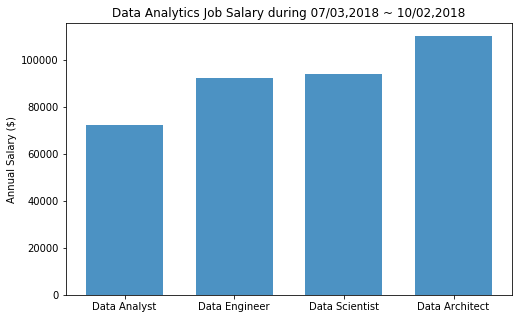

In [24]:
salary_by_job = {}

for keyword in list_of_keyword:
    df_filtered = df_list[df_list["Keyword"] == keyword]
    salary_list = df_filtered["Salary"].dropna().tolist()
    salary_by_job[keyword.title()] =  np.mean(salary_list)

    
keywords = sorted(salary_by_job, key=salary_by_job.__getitem__, reverse=True)
y_pos = np.arange(len(keywords))
salary = sorted(salary_by_job.values(), reverse=True)

print('During the period of {}, '.format(query_period)) 
for j in range(len(keywords)):
    print('  Average annual salary of {} jobs: ${:.1f}'.format(keywords[j], salary[j]))

keywords = keywords[::-1]
salary = salary[::-1]
    
plt.rcParams['figure.figsize'] = (8,5)
plt.bar(y_pos, salary, align='center', width=0.7, alpha=0.8)
plt.xticks(y_pos, keywords)
plt.ylabel('Annual Salary ($)')
plt.title('Data Analytics Job Salary during {}'.format(query_period))

plt.show()

### 4.2 Salary by Location


For Data Scientist Jobs:
  Average annual salary in San Francisco, California: $159239.6
  Average annual salary in San Jose, California: $156454.6
  Average annual salary in Philadelphia, Pennsylvania: $119880.7
  Average annual salary in Chicago, Illinois: $114175.9
  Average annual salary in Boston, Massachusetts: $113604.5
  Average annual salary in Irvine, California: $110800.1
  Average annual salary in Indianapolis, Indiana: $106136.0
  Average annual salary in Washington, DC: $103584.3
  Average annual salary in Los Angeles, California: $101643.7
  Average annual salary in Denver, Colorado: $94578.1
  Average annual salary in New York, New York State: $92656.5
  Average annual salary in Seattle, Washington State: $90796.3
  Average annual salary in San Diego, California: $89561.2
  Average annual salary in Dallas, Texas: $88706.7
  Average annual salary in Minneapolis, Minnesota: $85693.6
  Average annual salary in Austin, Texas: $83996.5
  Average annual salary in Houston, Te

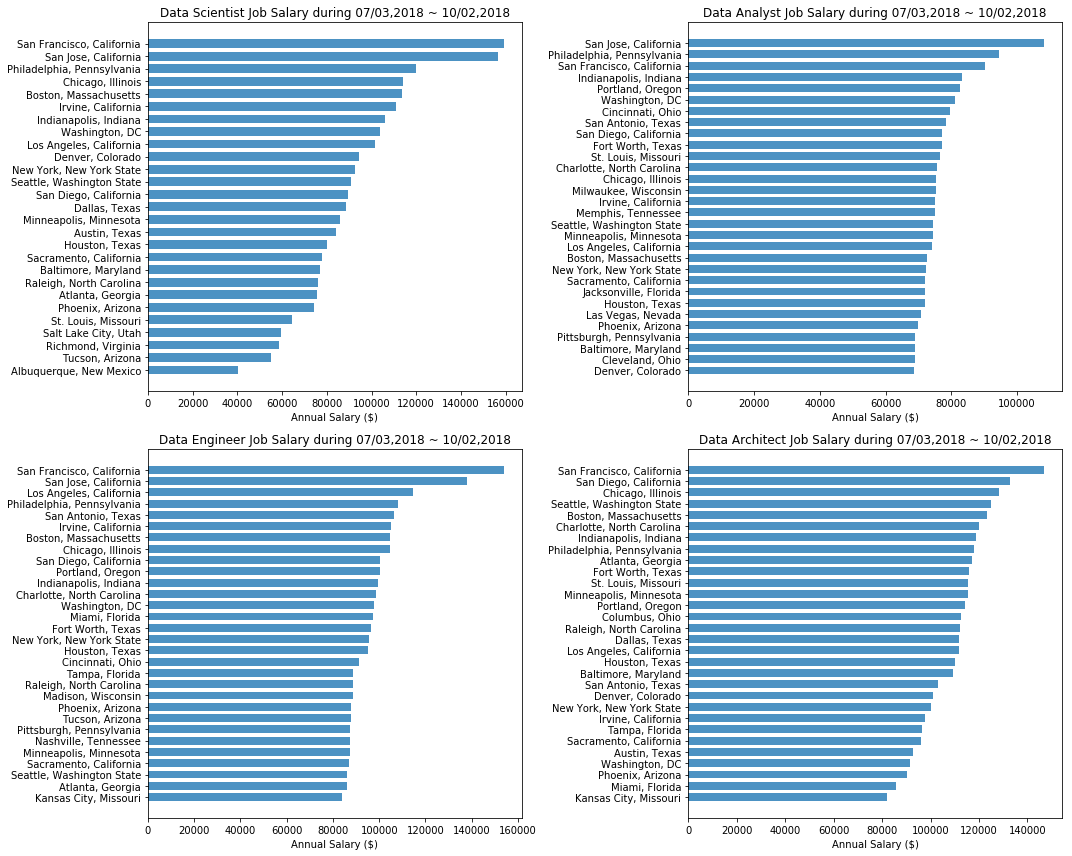

In [28]:
salary_by_job_location = []

for keyword in list_of_keyword:
    salary_by_location = {}
    df_filtered = df_list[df_list["Keyword"] == keyword]
    for location in list_of_location:
        df_filtered_ = df_filtered[df_filtered["Location"] == location]
        salary_list = df_filtered_["Salary"].dropna().tolist()
        if len(salary_list) < 10:
            continue
        salary_by_location[location] = np.mean(salary_list)
        
    salary_by_job_location.append((keyword, salary_by_location))

    
if len(salary_by_job_location)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,6*len(salary_by_job_location)//2)
else:
    plt.rcParams['figure.figsize'] = (15,6*(len(salary_by_job_location)//2+1))
    
    
for i in range(len(salary_by_job_location)):
    keyword = salary_by_job_location[i][0]
    salary_by_job = salary_by_job_location[i][1]
    
    locations = sorted(salary_by_job, key=salary_by_job.__getitem__, reverse=True)[0:30]
    y_pos = np.arange(len(locations))
    salary = sorted(salary_by_job.values(), reverse=True)[0:30]

    print('\nFor {} Jobs:'.format(keyword.title()))
    for j in range(len(locations)):
        print('  Average annual salary in {}: ${:.1f}'.format(locations[j], salary[j]))
 
    if len(salary_by_job_location)%2 == 0:
        plt.subplot(len(salary_by_job_location)//2,2,i+1)
    else:
        plt.subplot(len(salary_by_job_location)//2 + 1,2,i+1)
    
    locations = locations[::-1]
    salary = salary[::-1]
    plt.barh(y_pos, salary, align='center', height=0.7, alpha=0.8)
    plt.yticks(y_pos, locations)
    plt.xlabel('Annual Salary ($)')
    plt.title('{} Job Salary during {}'.format(keyword.title(), query_period))

plt.tight_layout()
plt.show()

### 4.3 Word Cloud for Job Descriptions

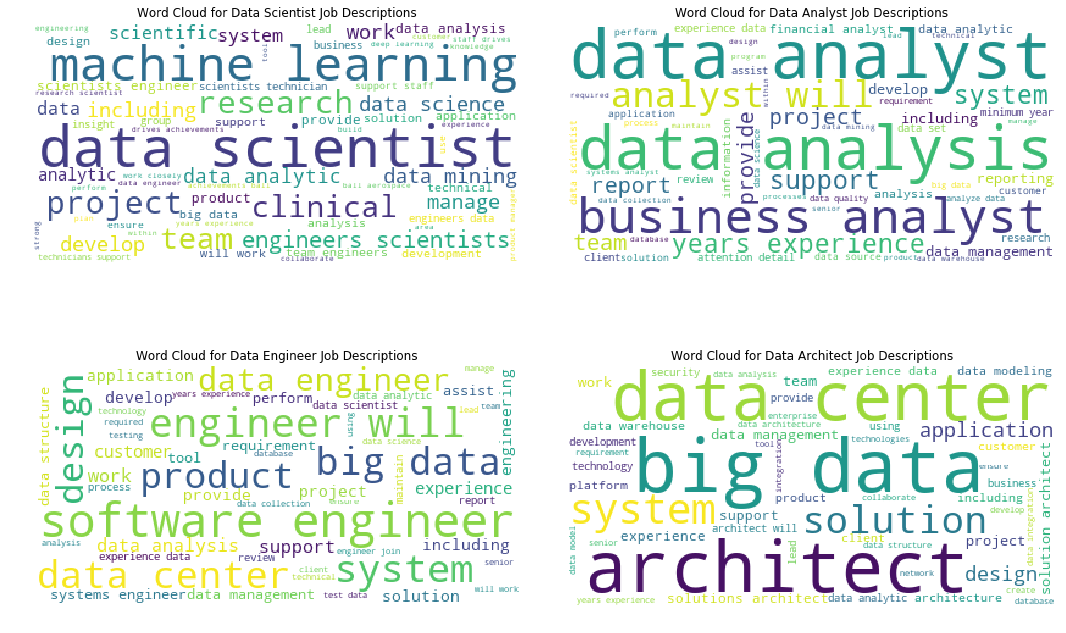

In [33]:
from wordcloud import WordCloud, STOPWORDS

if len(list_of_keyword)%2 == 0:
    plt.rcParams['figure.figsize'] = (15,5*len(list_of_keyword)//2)
else:
    plt.rcParams['figure.figsize'] = (15,5*(len(list_of_keyword)//2+1))


for i in range(len(list_of_keyword)):
    if len(list_of_keyword)%2 == 0:
        plt.subplot(len(list_of_keyword)//2,2,i+1)
    else:
        plt.subplot(len(list_of_keyword)//2 + 1,2,i+1)
        
    df_filtered = df_list[df_list["Keyword"] == list_of_keyword[i]]
    wordcloud = WordCloud(
                            background_color = 'white',
                            stopwords = set(STOPWORDS),
                            max_font_size = 60,
                            min_font_size = 6,
                            max_words = 200,
                            ).generate(' '.join(df_filtered['Summary']).lower())
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Word Cloud for {} Job Descriptions'.format(list_of_keyword[i].title()))
    
plt.tight_layout()
plt.show()

### 4.4 Saving the job list as a csv file

In [31]:
now = datetime.now()
df_list.to_csv('Job List' + now.strftime("_%m%d%y")+'.csv', encoding='utf-8')